In [ ]:
pip install Fiona --quiet

In [ ]:
pip install geopandas

In [5]:
from fiona.drvsupport import supported_drivers
import geopandas as gpd
import fiona

In [6]:
# Read the file
df = gpd.read_file('/content/drive/MyDrive/Adv_Analytics_Project/NYC Area2010_2data.shp')

In [8]:
df.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
df['geometry'].head()

0    POLYGON ((1841847.969 592630.580, 1841844.383 ...
1    POLYGON ((1837243.410 591078.541, 1837243.165 ...
2    POLYGON ((1831763.078 592912.026, 1831671.368 ...
3    POLYGON ((1831799.005 592819.149, 1831826.938 ...
4    POLYGON ((1831900.996 592721.904, 1831900.789 ...
Name: geometry, dtype: geometry

In [10]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [13]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 108487 entries, 0 to 108486
Data columns (total 71 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STATEFP10   108487 non-null  object  
 1   COUNTYFP10  108487 non-null  int64   
 2   TRACTCE10   108487 non-null  object  
 3   BLOCKCE10   108487 non-null  object  
 4   GEOID10     108487 non-null  object  
 5   NAME10      108487 non-null  object  
 6   MTFCC10     108487 non-null  object  
 7   UR10        108487 non-null  object  
 8   UACE10      103786 non-null  object  
 9   UATYP10     103786 non-null  object  
 10  FUNCSTAT10  108487 non-null  object  
 11  ALAND10     108487 non-null  int64   
 12  AWATER10    108487 non-null  int64   
 13  INTPTLAT10  108487 non-null  object  
 14  INTPTLON10  108487 non-null  object  
 15  GISJOIN     108487 non-null  object  
 16  Shape_area  108487 non-null  float64 
 17  Shape_len   108487 non-null  float64 
 18  C000_02     1084

In [11]:
print(df.head(2))

  STATEFP10  COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10      NAME10  \
0        36           5    051600      5011  360050516005011  Block 5011   
1        36           5    030000      4003  360050300004003  Block 4003   

  MTFCC10 UR10 UACE10 UATYP10  ... CE03_12  C000_13  CE01_13 CE02_13 CE03_13  \
0   G5040    U  63217       U  ...       0        0        0       0       0   
1   G5040    U  63217       U  ...      46       93       18      26      49   

  C000_14  CE01_14  CE02_14  CE03_14  \
0       0        0        0        0   
1     111       22       38       51   

                                            geometry  
0  POLYGON ((1841847.969 592630.580, 1841844.383 ...  
1  POLYGON ((1837243.410 591078.541, 1837243.165 ...  

[2 rows x 71 columns]


In [14]:
# Let's make a backup copy of our data
USA_Contiguous_Albers_Equal_Area_Conic = df.copy()

# Reproject the data
data = df.to_crs("ESRI:102003")

In [15]:
# Check the new geometry values
print(data['geometry'].head())

0    POLYGON ((1841847.969 592630.580, 1841844.383 ...
1    POLYGON ((1837243.410 591078.541, 1837243.165 ...
2    POLYGON ((1831763.078 592912.026, 1831671.368 ...
3    POLYGON ((1831799.005 592819.149, 1831826.938 ...
4    POLYGON ((1831900.996 592721.904, 1831900.789 ...
Name: geometry, dtype: geometry


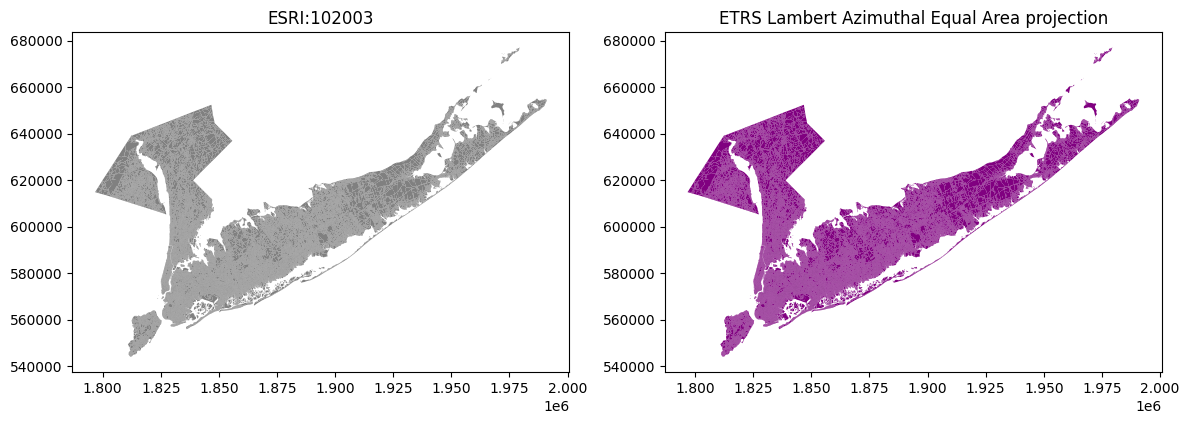

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
USA_Contiguous_Albers_Equal_Area_Conic.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("ESRI:102003");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='purple');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [17]:
# Ouput filepath
outfp = "NYC_borders.shp"
    
# Save to disk
data.to_file(outfp)

In [18]:
# Let's see the current CRS of our data
print(data.crs)

ESRI:102003


In [20]:
# Import CRS class from pyproj
import pyproj

crs_obj= pyproj.CRS.from_string("ESRI:102003")

In [21]:
# Name
print("Name:", crs_obj.name)

# Coordinate system
print("Coordinate system:", crs_obj.coordinate_system)

# Bounds of the area where CRS is used
print("Bounds:", crs_obj.area_of_use.bounds)

Name: USA_Contiguous_Albers_Equal_Area_Conic
Coordinate system: cartesian
Bounds: (-124.79, 24.41, -66.91, 49.38)


In [22]:
data['area'] = data.geometry.area

In [ ]:
# Select the column of interest
area = data["area"]

# Plot the area using an area plot
plt.fill_between(range(len(area)), area)
plt.show()

Text(0.5, 1.0, 'Area plot')

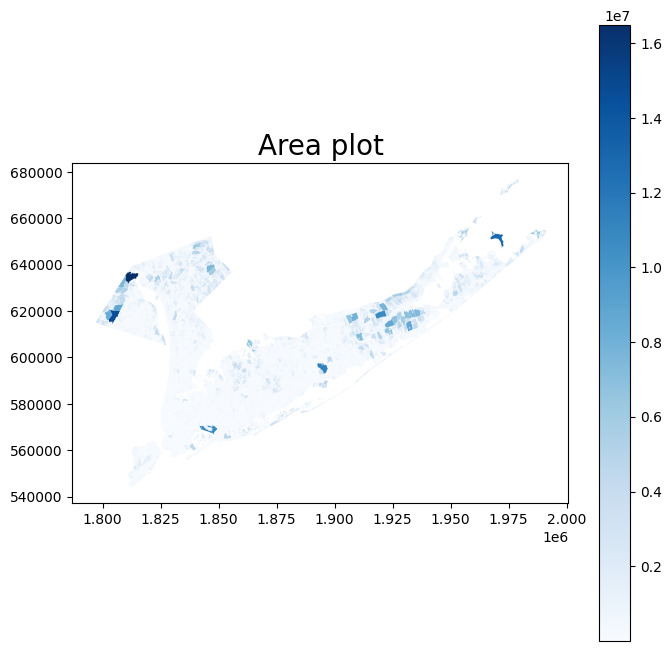

In [34]:
data.plot(column='Shape_area', cmap='Blues', figsize=(8, 8),legend=True)
# Add title
plt.title('Area plot', fontsize=20)

In [28]:
data.geometry.area


0          47448.010899
1          16162.054524
2         128949.887746
3          77469.634303
4           5358.830339
              ...      
108482     12830.884766
108483     21951.563593
108484      2948.622271
108485     12347.022370
108486     26005.607897
Length: 108487, dtype: float64

In [29]:
data['Shape_area'].mean()


51151.14793542108

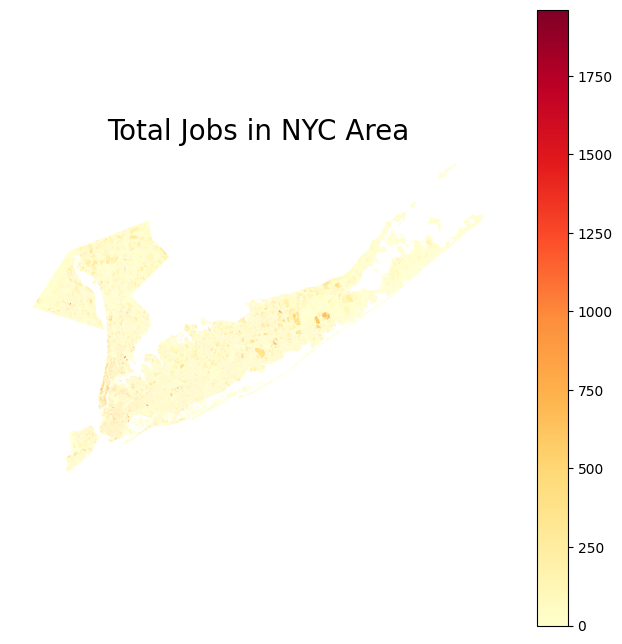

In [33]:
import matplotlib.pyplot as plt

# Create choropleth map
data.plot(column='C000_02', cmap='YlOrRd', figsize=(8, 8), legend=True)

# Add title
plt.title('Total Jobs in NYC Area', fontsize=20)

# Remove axes
plt.axis('off')

# Show map
plt.show()

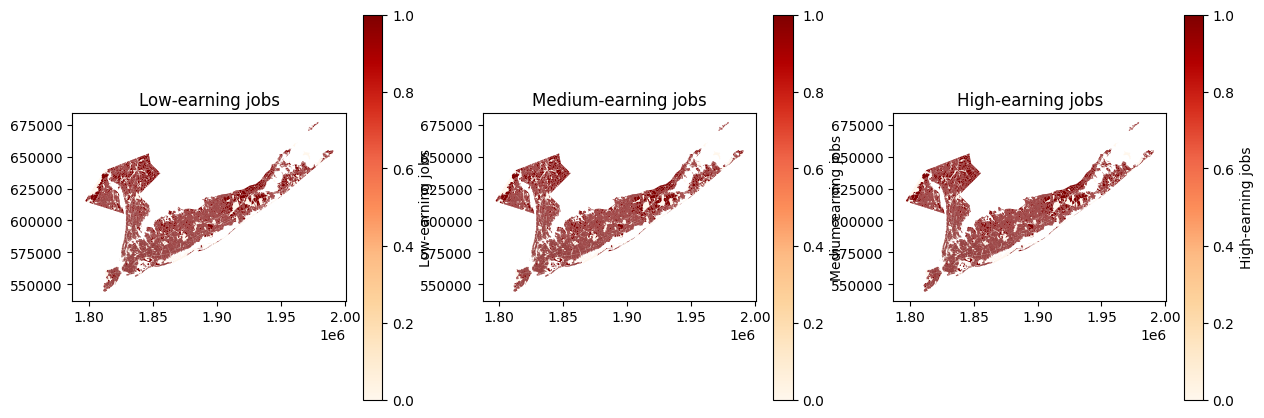

In [55]:
from matplotlib.colors import Normalize
cols = ['CE01_02', 'CE02_02', 'CE03_02', 'geometry']
data = data[cols]

# Normalize data for each job type
for col in ['CE01_02', 'CE02_02', 'CE03_02']:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

# Create subplots for each job type
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot choropleth map for low-earning jobs
df.plot(column='CE01_02', cmap='OrRd', ax=axs[0],
        norm=Normalize(vmin=0, vmax=1), legend=True,
        legend_kwds={'label': 'Low-earning jobs'})

# Plot choropleth map for medium-earning jobs
df.plot(column='CE02_02', cmap='OrRd', ax=axs[1],
        norm=Normalize(vmin=0, vmax=1), legend=True,
        legend_kwds={'label': 'Medium-earning jobs'})

# Plot choropleth map for high-earning jobs
df.plot(column='CE03_02', cmap='OrRd', ax=axs[2],
        norm=Normalize(vmin=0, vmax=1), legend=True,
        legend_kwds={'label': 'High-earning jobs'})

# Set titles for each subplot
axs[0].set_title('Low-earning jobs')
axs[1].set_title('Medium-earning jobs')
axs[2].set_title('High-earning jobs')


plt.show()

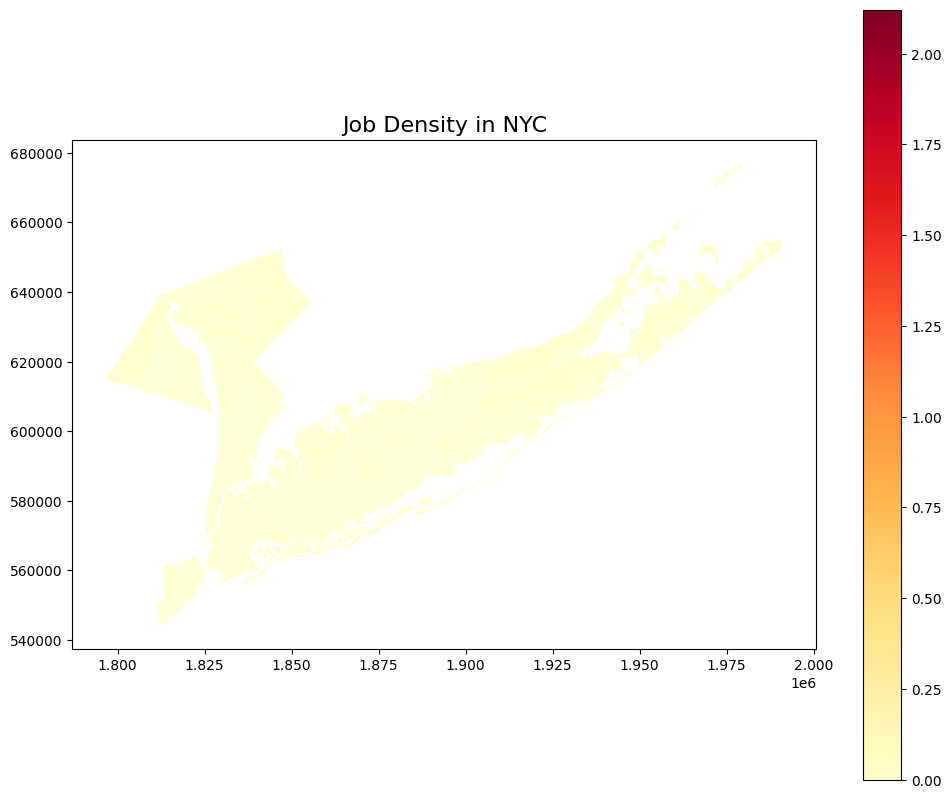

In [42]:
# Calculate job density
df['job_density'] = df['C000_02'] / df['Shape_area']

# Create a choropleth map
fig, ax = plt.subplots(figsize=(12, 10))
df.plot(column='job_density', cmap='YlOrRd', ax=ax, legend=True)
ax.set_title('Job Density in NYC', fontsize=16)
plt.show()

In [46]:
pip install --upgrade mapclassify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


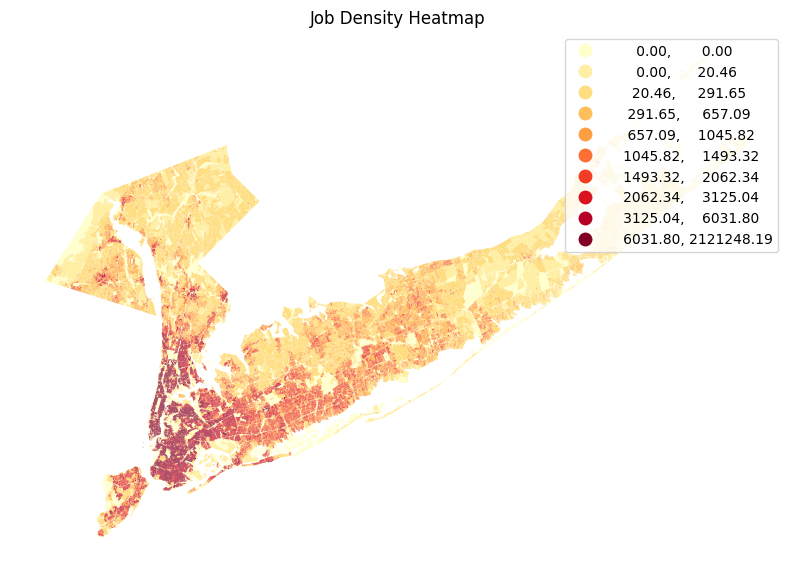

In [47]:
# Calculate job density
df['job_density'] = df['C000_02'] / df.geometry.area * 10**6

# Plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.set_title('Job Density Heatmap')

df.plot(column='job_density', ax=ax, cmap='YlOrRd', scheme='quantiles', k=10, legend=True)
plt.show()

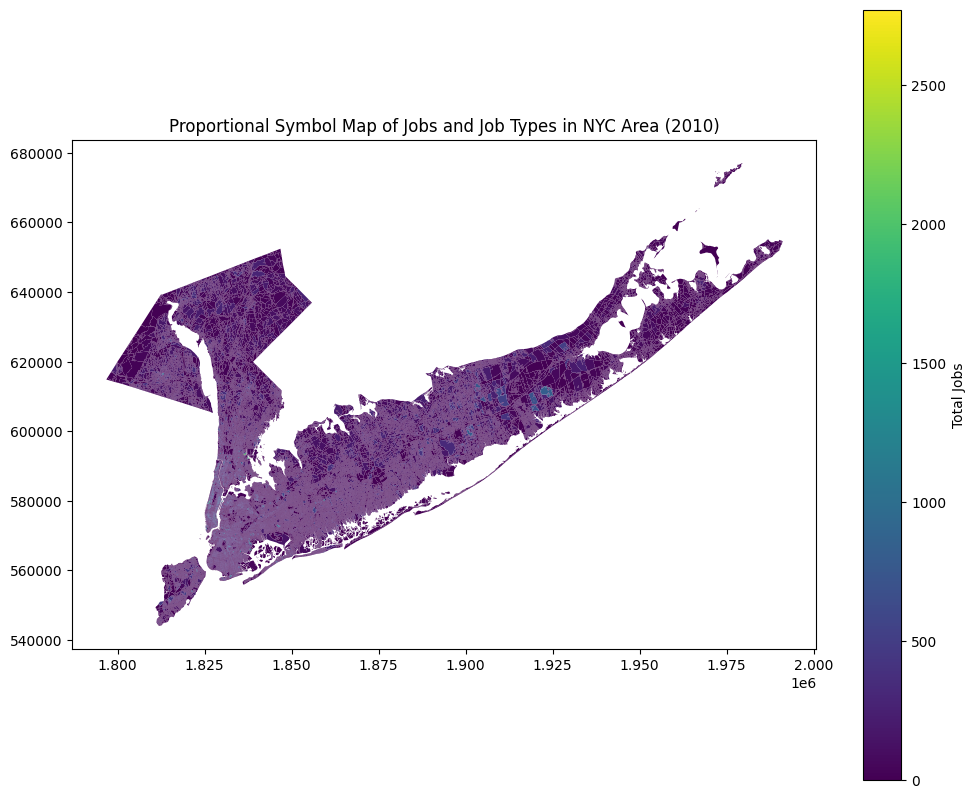

In [54]:
# Create a new figure
fig, ax = plt.subplots(figsize=(12,10))

# Plot proportional symbols on map
df.plot(column='C000_10', ax=ax, legend=True, legend_kwds={'label': 'Total Jobs'})

ax.set_title('Proportional Symbol Map of Jobs and Job Types in NYC Area (2010)')

# Display plot
plt.show()